# Technical TASK 1 :- Prediction using Supervised ML (Level - Beginner)

In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#  Reading Data from Data via link provided

In [3]:
data = pd.read_csv('http://bit.ly/w-data')
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Visualization 

We will try find any relationship between the data manually.

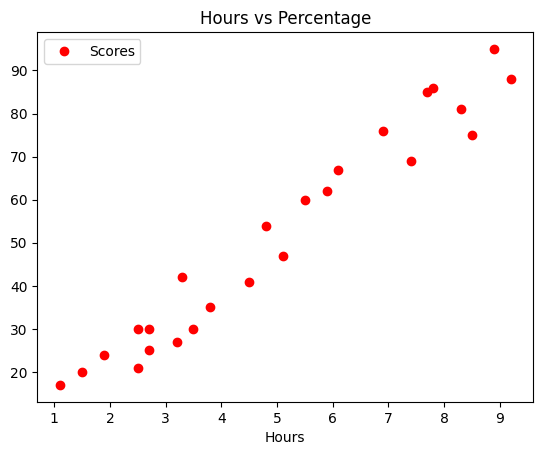

In [6]:
data.plot(x='Hours', y='Scores', style='o',color='red')
plt.title('Hours vs Percentage')
plt.show()

# Preparing the Data

In [7]:
x = data.iloc[:, : -1].values
y = data.iloc[:, 1].values

# Algorithm Training 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [9]:
print("Training Done Successfully !!")

Training Done Successfully !!


# Plotting the Line of Regression

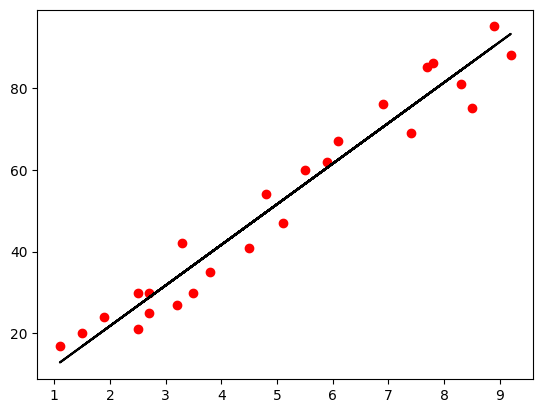

In [12]:
line = regressor.coef_*x+regressor.intercept_


plt.scatter (x,y, color='red')
plt.plot (x, line, color = 'Black')
plt.show()

# Making Predictions

In [13]:
### Testing data - In Hours
print(x_test)

### Predicting the scores
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Comparing Actual vs Predicted

In [15]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Estimating Training Data and Testing Data Scores

In [17]:
print("Training Data ", regressor.score(x_train,y_train))
print("Testing Data ", regressor.score(x_test,y_test))

Training Data  0.9515510725211552
Testing Data  0.9454906892105355


# Ploting the line graph to depict the diffrence between the actual and predicted value.

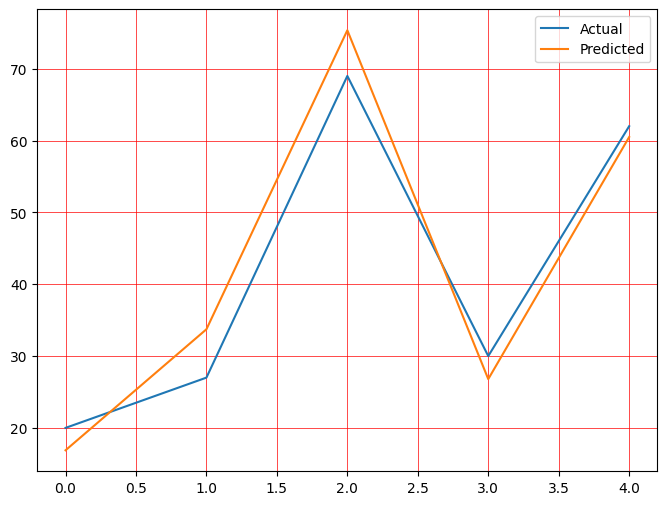

In [21]:
data.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'black')
plt.grid(which='major', linewidth='0.5', color = 'red')
plt.show()

# Testing my own Data

In [23]:
hours = 8.4
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 8.4
Predicted Score = 85.26767447882946


# Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root mean squared Error: 4.647447612100367
